In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import imutils 
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np

time: 1.87 s


In [63]:
%load_ext autotime
%matplotlib inline

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 12 ms


In [7]:
# appending name of files in list

left_path = r'D:\eye detection\Eye dataset\left_look'
forward_path = r'D:\eye detection\Eye dataset\forward_look'
closed_path = r'D:\eye detection\Eye dataset\close_look'
right_path = r'D:\eye detection\Eye dataset\right_look'

left = [l for l in os.listdir(left_path)]
forward = [f for f in os.listdir(forward_path)]
closed = [c for c in os.listdir(closed_path)]
right = [r for r in os.listdir(right_path)]

time: 25.9 ms


In [8]:
print(len(left))
print(len(forward))
print(len(closed))
print(len(right))
print('-----------------')
print(len(left))
print(len(left+forward))
print(len(left+forward+closed))
print(len(left+forward+closed+right))
print('-----------------')
print(len(left+right+closed+forward))

3498
3457
3828
3577
-----------------
3498
6955
10783
14360
-----------------
14360
time: 8 ms


In [9]:
forward_path = r'D:\eye detection\Eye dataset\forward_look'
forward = [f for f in os.listdir(forward_path)]
print(forward)
print(len(forward))

['forward_look (1).jpg', 'forward_look (1).png', 'forward_look (10).jpg', 'forward_look (10).png', 'forward_look (100).jpg', 'forward_look (100).png', 'forward_look (1000).png', 'forward_look (1001).png', 'forward_look (1002).png', 'forward_look (1003).png', 'forward_look (1004).png', 'forward_look (1005).png', 'forward_look (1006).png', 'forward_look (1007).png', 'forward_look (1008).png', 'forward_look (1009).png', 'forward_look (101).jpg', 'forward_look (101).png', 'forward_look (1010).png', 'forward_look (1011).png', 'forward_look (1012).png', 'forward_look (1013).png', 'forward_look (1014).png', 'forward_look (1015).png', 'forward_look (1016).png', 'forward_look (1017).png', 'forward_look (1018).png', 'forward_look (1019).png', 'forward_look (102).jpg', 'forward_look (102).png', 'forward_look (1020).png', 'forward_look (1021).png', 'forward_look (1022).png', 'forward_look (1023).png', 'forward_look (1024).png', 'forward_look (1025).png', 'forward_look (1026).png', 'forward_look (1

In [10]:
left_path = r'D:\eye detection\Eye dataset\left_look'
left = [f for f in os.listdir(left_path)]
print(left)
print(len(left))

['left_ (1).png', 'left_ (2).png', 'left_ (3).png', 'left_(1).jpg', 'left_(1).png', 'left_(10).jpg', 'left_(10).png', 'left_(100).jpg', 'left_(100).png', 'left_(1000).jpg', 'left_(1000).png', 'left_(1001).jpg', 'left_(1001).png', 'left_(1002).jpg', 'left_(1002).png', 'left_(1003).jpg', 'left_(1003).png', 'left_(1004).jpg', 'left_(1004).png', 'left_(1005).jpg', 'left_(1005).png', 'left_(1006).jpg', 'left_(1006).png', 'left_(1007).jpg', 'left_(1007).png', 'left_(1008).jpg', 'left_(1008).png', 'left_(1009).jpg', 'left_(1009).png', 'left_(101).jpg', 'left_(101).png', 'left_(1010).jpg', 'left_(1010).png', 'left_(1011).jpg', 'left_(1011).png', 'left_(1012).jpg', 'left_(1012).png', 'left_(1013).jpg', 'left_(1013).png', 'left_(1014).jpg', 'left_(1014).png', 'left_(1015).jpg', 'left_(1015).png', 'left_(1016).jpg', 'left_(1016).png', 'left_(1017).jpg', 'left_(1017).png', 'left_(1018).jpg', 'left_(1018).png', 'left_(1019).jpg', 'left_(1019).png', 'left_(102).jpg', 'left_(102).png', 'left_(1020).j

In [11]:
closed_path = r'D:\eye detection\Eye dataset\close_look'
closed = [f for f in os.listdir(closed_path)]
print(closed)
print(len(closed))

['eye_closed (1).png', 'eye_closed (10).png', 'eye_closed (11).png', 'eye_closed (12).png', 'eye_closed (13).png', 'eye_closed (14).png', 'eye_closed (2).png', 'eye_closed (3).png', 'eye_closed (4).png', 'eye_closed (5).png', 'eye_closed (6).png', 'eye_closed (7).png', 'eye_closed (8).png', 'eye_closed (9).png', 'eye_closed(1).png', 'eye_closed(10).png', 'eye_closed(100).png', 'eye_closed(1000).png', 'eye_closed(1001).png', 'eye_closed(1002).png', 'eye_closed(1003).png', 'eye_closed(1004).png', 'eye_closed(1005).png', 'eye_closed(1006).png', 'eye_closed(1007).png', 'eye_closed(1008).png', 'eye_closed(1009).png', 'eye_closed(101).png', 'eye_closed(1010).png', 'eye_closed(1011).png', 'eye_closed(1012).png', 'eye_closed(1013).png', 'eye_closed(1014).png', 'eye_closed(1015).png', 'eye_closed(1016).png', 'eye_closed(1017).png', 'eye_closed(1018).png', 'eye_closed(1019).png', 'eye_closed(102).png', 'eye_closed(1020).png', 'eye_closed(1021).png', 'eye_closed(1022).png', 'eye_closed(1023).png'

In [12]:
right_path = r'D:\eye detection\Eye dataset\right_look'
right = [f for f in os.listdir(right_path)]
print(right)
print(len(right))

['right_(0).jpg', 'right_(0).png', 'right_(1).jpg', 'right_(1).png', 'right_(10).jpg', 'right_(10).png', 'right_(100).jpg', 'right_(100).png', 'right_(1000).jpg', 'right_(1000).png', 'right_(1001).jpg', 'right_(1001).png', 'right_(1002).jpg', 'right_(1002).png', 'right_(1003).jpg', 'right_(1003).png', 'right_(1004).jpg', 'right_(1004).png', 'right_(1005).jpg', 'right_(1005).png', 'right_(1006).jpg', 'right_(1006).png', 'right_(1007).jpg', 'right_(1007).png', 'right_(1008).jpg', 'right_(1008).png', 'right_(1009).jpg', 'right_(1009).png', 'right_(101).jpg', 'right_(101).png', 'right_(1010).jpg', 'right_(1010).png', 'right_(1011).jpg', 'right_(1011).png', 'right_(1012).jpg', 'right_(1012).png', 'right_(1013).jpg', 'right_(1013).png', 'right_(1014).jpg', 'right_(1014).png', 'right_(1015).jpg', 'right_(1015).png', 'right_(1016).jpg', 'right_(1016).png', 'right_(1017).jpg', 'right_(1017).png', 'right_(1018).jpg', 'right_(1018).png', 'right_(1019).jpg', 'right_(1019).png', 'right_(102).jpg', 

In [16]:
# # flipping and saving image in other folder

# left_path = r'D:\eye detection\Eye dataset\left_look'
# forward_path = r'D:\eye detection\Eye dataset\forward_look'
# closed_path = r'D:\eye detection\Eye dataset\close_look'
# right_path = r'D:\eye detection\Eye dataset\right_look'
# temp_path = r'D:\eye detection\Eye dataset\temp'

# eye_img = []
# flipped_img = []
# for filename in os.listdir(temp_path):
#     img = cv2.imread(os.path.join(temp_path,filename),0)
#     eye_img.append(img)
    
#     flipped = cv2.flip(img,1)
#     flipped_img.append(flipped)
    
#     for i, flipped in enumerate(flipped_img):
#         cv2.imwrite(r'D:\eye detection\Eye dataset\left_look\eglare_flipped_' + str(i) + ".jpg", flipped)

Error in callback <function LineWatcher.stop at 0x000001A97F00E6A8> (for post_run_cell):


AssertionError: 

In [17]:
# data augmentation 

# left_path = r'D:\eye detection\Eye dataset\left_look'
# forward_path = r'D:\eye detection\Eye dataset\forward_look'
# closed_path = r'D:\eye detection\Eye dataset\close_look'
# right_path = r'D:\eye detection\Eye dataset\right_look'
# temp_path = r'D:\eye detection\Eye dataset\temp'

# eye_img = []
# flipped_img = []
# for filename in os.listdir(temp_path):
#     img = cv2.imread(os.path.join(temp_path,filename),0)
#     eye_img.append(img)
    
#     flipped = ndimage.rotate(img,30,reshape=False)
#     flipped_img.append(flipped)
    
#     for i, flipped in enumerate(flipped_img):
#         cv2.imwrite(r'D:\eye detection\Eye dataset\left_look\a_flipped_' + str(i) + ".jpg", flipped)

Error in callback <function LineWatcher.stop at 0x000001A97F00E6A8> (for post_run_cell):


AssertionError: 

In [ ]:
# plotting the images

# plt.subplot(2,1,1)
# plt.imshow(eye_img[452])
# plt.subplot(2,1,2)
# plt.imshow(flipped_img[452])

# for i in range(0,5):
#     plt.figure(figsize=(40,40))
#     plt.subplot(5,5,i+1)
#     plt.imshow(eye_img[(i+1)*(j+1)])

In [18]:
# appending all images in list

left_path = r'D:\eye detection\Eye dataset\left_look'
forward_path = r'D:\eye detection\Eye dataset\forward_look'
closed_path = r'D:\eye detection\Eye dataset\close_look'
right_path = r'D:\eye detection\Eye dataset\right_look'

eye_img = []

for filename in os.listdir(left_path):
    img = cv2.imread(os.path.join(left_path,filename),0)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    eye_img.append(img)

for filename in os.listdir(forward_path):
    img = cv2.imread(os.path.join(forward_path,filename),0)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    eye_img.append(img)

for filename in os.listdir(closed_path):
    img = cv2.imread(os.path.join(closed_path,filename),0)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    eye_img.append(img)

for filename in os.listdir(right_path):
    img = cv2.imread(os.path.join(right_path,filename),0)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    eye_img.append(img)

print(len(eye_img))

14360
time: 2min 17s


In [19]:
eye_img[2356].shape

(76, 76, 3)

time: 8 ms


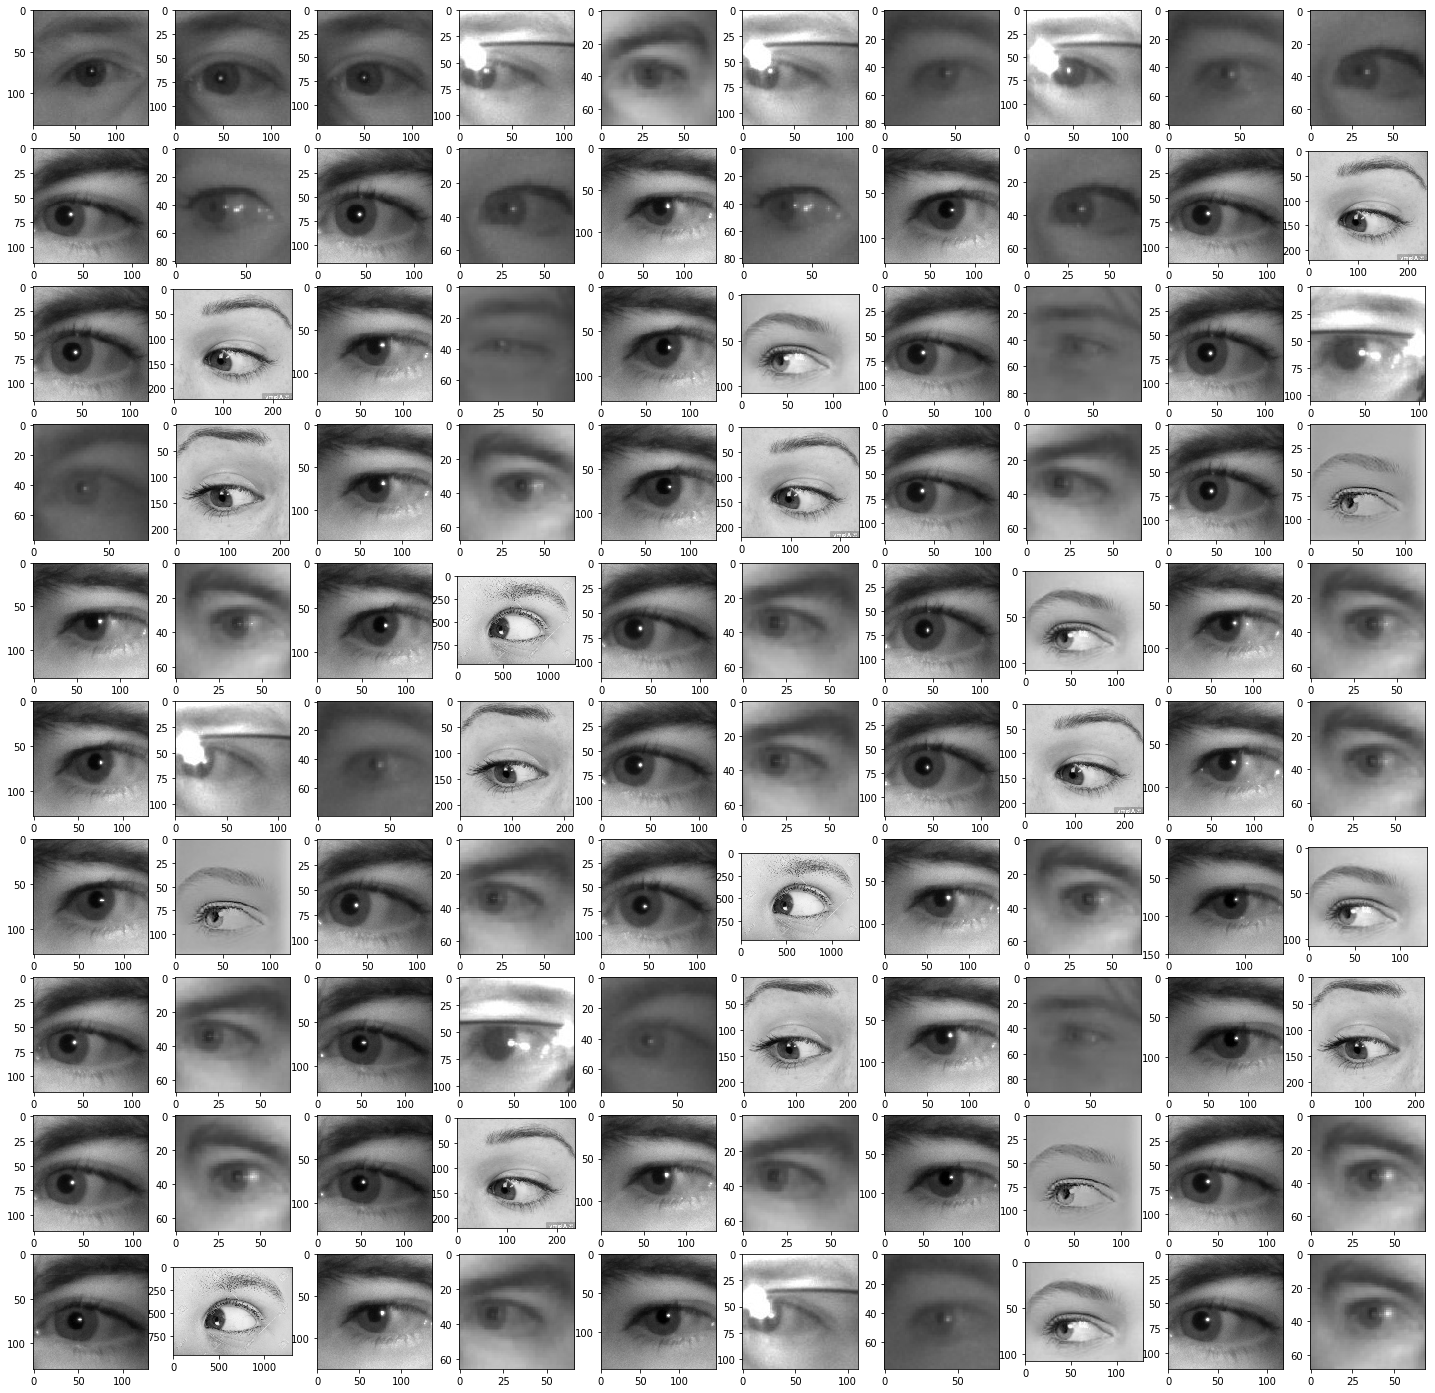

time: 18.8 s


In [13]:
plt.figure(figsize=(25,25))
for i in range(0,101):
    if i<100:
        plt.subplot(10,10,i+1)
        plt.imshow(eye_img[i])
    else:
        break

In [20]:
train_images = []
for img in eye_img:
    f_img = img.astype('float32')
    f_img = cv2.resize(img,(80,80))
    f_img = np.array(f_img)
    f_img = f_img/255
    train_images.append(f_img)

time: 8.46 s


In [21]:
print(train_images[9598].shape)
print(type(train_images[9598]))

(80, 80, 3)
<class 'numpy.ndarray'>
time: 4 ms


In [22]:
train_images = np.array(train_images)

time: 18.9 s


In [23]:
len(train_images)

14360

time: 89.5 ms


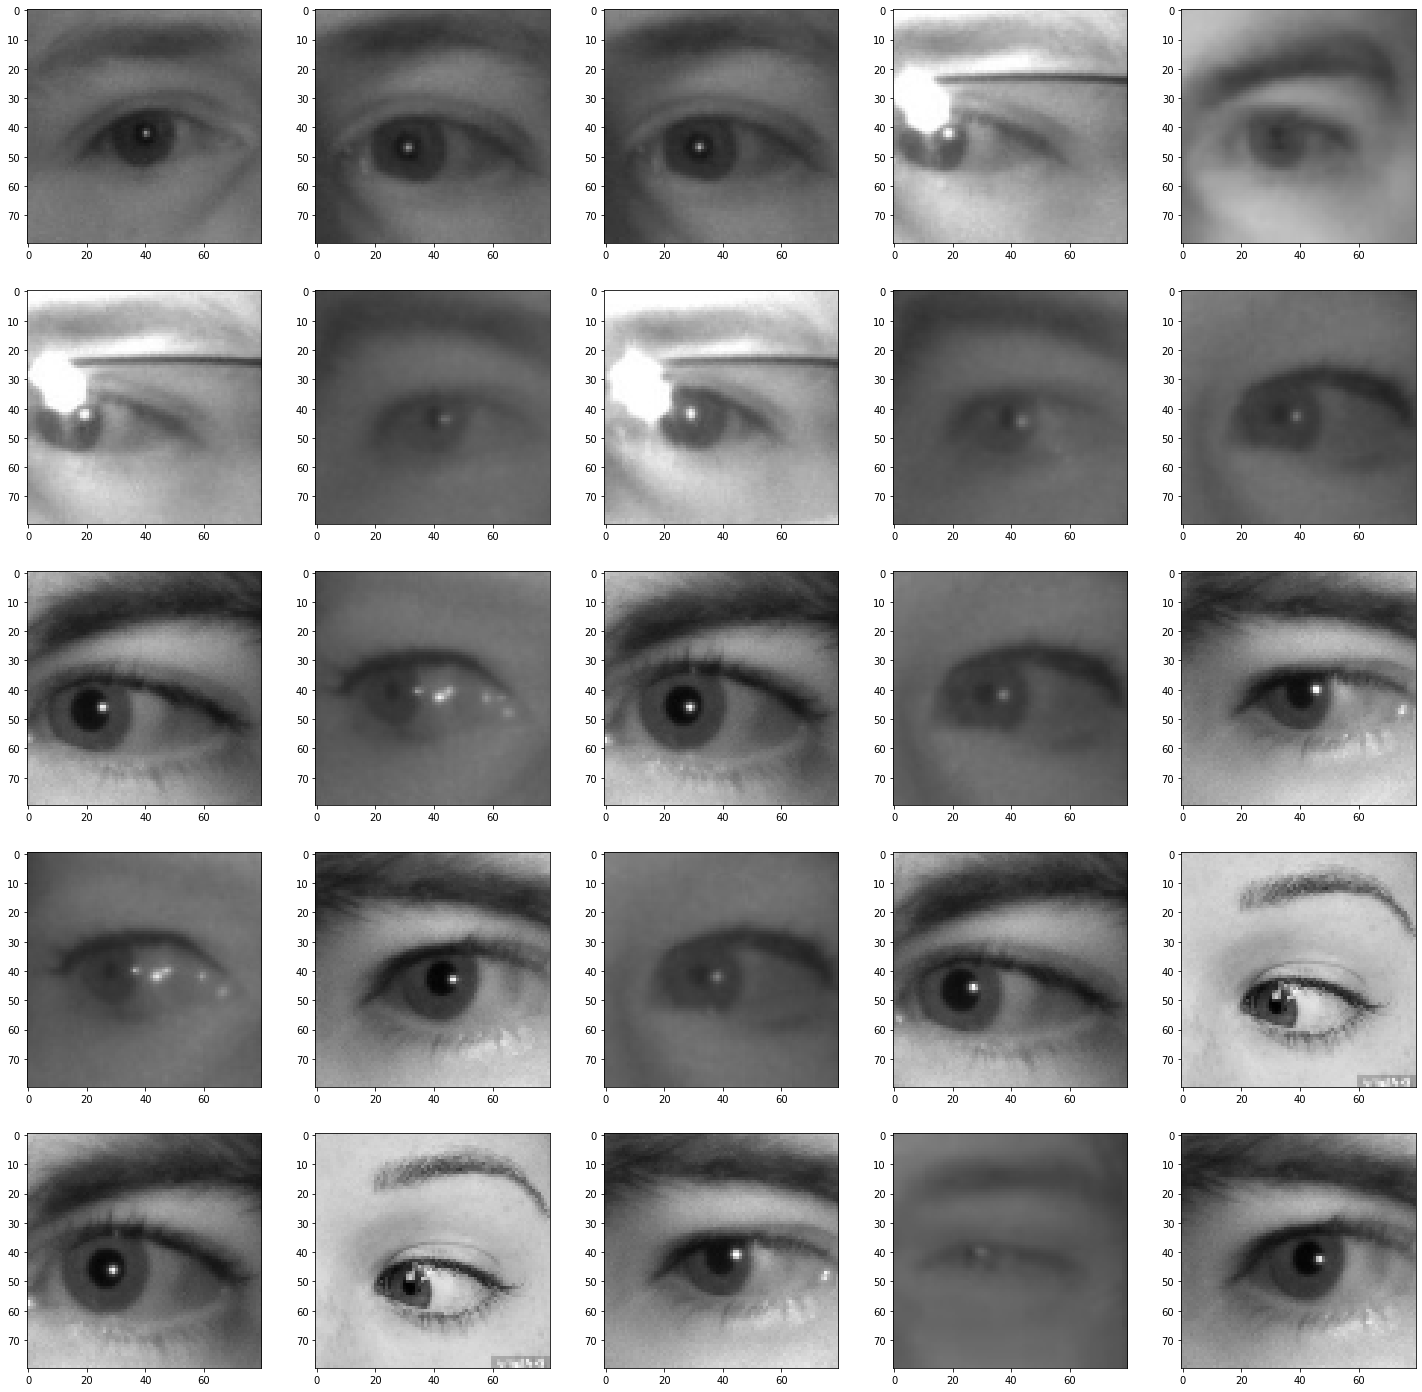

time: 5.79 s


In [26]:
plt.figure(figsize=(25,25))
for i in range(0,26):
    if i<25:
        plt.subplot(5,5,i+1)
        plt.imshow(train_images[i])
    else:
        break

In [24]:
# assigning class labels

train_labels = np.zeros(len(train_images),dtype='int')
train_labels[:3498]=int(0) # left
train_labels[3498:6955]=int(1) # forward
train_labels[6955:10783]=int(2) # closed
train_labels[10783:]=int(3) # right

# print(train_labels)
print(len(train_labels))
print(type(train_labels))

14360
<class 'numpy.ndarray'>
time: 169 ms


In [25]:
train_label_name = []
train_label_name.extend(left)
train_label_name.extend(forward)
train_label_name.extend(closed)
train_label_name.extend(right)
print(len(train_label_name))

# print(train_label_name[0:3498])
# print(train_label_name[3498:6955])
# print(train_label_name[6955:10783])
# print(train_label_name[10783:])

14360
time: 4 ms


In [26]:
h=list(np.random.randint(0,14360,2000))
h.sort()
print(len(h))

2000
time: 589 ms


In [27]:
test_images = []
for index in h:
    img = train_images[index]
    test_images.append(img)
    
test_images = np.array(test_images)
print(len(test_images))

2000
time: 398 ms


In [28]:
print(test_images[665].shape)
print(type(test_images[665]))

(80, 80, 3)
<class 'numpy.ndarray'>
time: 8.01 ms


In [29]:
test_labels = []
for index in h:
    img = train_labels[index]
    test_labels.append(img)

test_labels = np.array(test_labels)
print(test_labels)
print(len(test_labels))

[0 0 0 ... 3 3 3]
2000
time: 44 ms


In [30]:
test_labels.shape

(2000,)

time: 4 ms


In [31]:
train_labels = np.reshape(train_labels,(14360,1))
test_labels = np.reshape(test_labels,(2000,1))

time: 4 ms


In [32]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(14360, 80, 80, 3)
(14360, 1)
(2000, 80, 80, 3)
(2000, 1)
Error in callback <function LineWatcher.stop at 0x000001A97F00E6A8> (for post_run_cell):


AssertionError: 

In [33]:
print(test_labels[1020],train_labels[2365])

[2] [0]
time: 4 ms


In [34]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

14360
14360
2000
2000
Error in callback <function LineWatcher.stop at 0x000001A97F00E6A8> (for post_run_cell):


AssertionError: 

In [35]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(80, 80 ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
time: 3.83 s


In [36]:
# defining a cnn

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization(2,2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(4, activation='softmax'))

time: 4 ms


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3276928   
__________

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

time: 620 ms


In [39]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 14360 samples, validate on 2000 samples
Epoch 1/5
14360/14360 [==============================] - 203s 14ms/sample - loss: 0.3313 - acc: 0.8754 - val_loss: 0.1261 - val_acc: 0.9600
Epoch 2/5
14360/14360 [==============================] - 204s 14ms/sample - loss: 0.1161 - acc: 0.9643 - val_loss: 0.0876 - val_acc: 0.9700
Epoch 3/5
14360/14360 [==============================] - 209s 15ms/sample - loss: 0.0784 - acc: 0.9769 - val_loss: 0.0552 - val_acc: 0.9840
Epoch 4/5
14360/14360 [==============================] - 208s 14ms/sample - loss: 0.0640 - acc: 0.9803 - val_loss: 0.0488 - val_acc: 0.9855
Epoch 5/5
14360/14360 [==============================] - 211s 15ms/sample - loss: 0.0562 - acc: 0.9839 - val_loss: 0.0419 - val_acc: 0.9870
time: 17min 20s


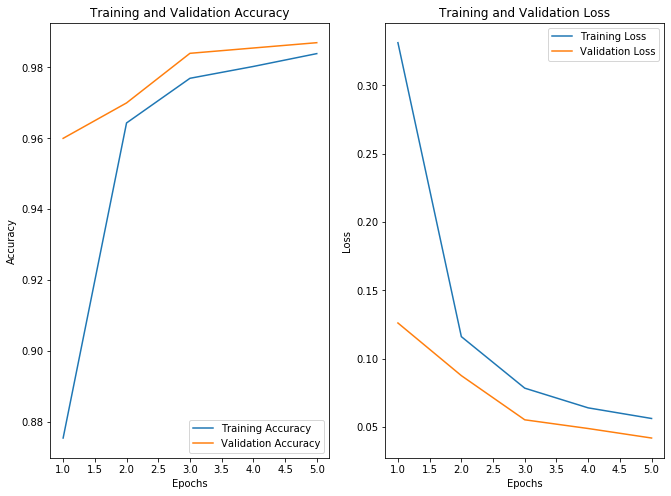

time: 1.87 s


In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(11, 8))
plt.subplot(1, 2, 1)
plt.plot([1,2,3,4,5],acc, label='Training Accuracy')
plt.plot([1,2,3,4,5],val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([1,2,3,4,5],loss, label='Training Loss')
plt.plot([1,2,3,4,5],val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

 - 9s - loss: 0.0419 - acc: 0.9870
time: 8.88 s


In [43]:
pred_val = model.predict_classes(test_images)

time: 9.34 s


In [52]:
index = np.random.randint(0,2000,20)
index

array([ 268,  943,  679,   12, 1169, 1417, 1995, 1965,  475, 1445, 1091,
        612, 1366,  449, 1978, 1630, 1845,  692, 1844, 1592])

time: 15.6 ms


In [53]:
label_dict = {0:'left',1:'forward',2:'closed',3:'right'}

print('original class', pred_val[index])
print('predicted class', test_labels[index])

original class [0 1 1 0 2 2 3 3 1 2 2 1 2 0 3 3 3 1 3 3]
predicted class [[0]
 [1]
 [1]
 [0]
 [2]
 [2]
 [3]
 [3]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]]
time: 3 ms


In [50]:
!pip install -q pyyaml h5py

time: 22.8 s


In [55]:
model.save('D:\eye detection\eye_direction.h5')

time: 250 ms


In [56]:
detector = tf.keras.models.load_model('D:\eye detection\eye_direction.h5')

time: 7 s


In [57]:
detector.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3276928   
__________

In [58]:
pred_cls = detector.predict_classes(test_images)

time: 8.81 s


In [61]:
index1 = np.random.randint(0,2000,20)
index1

array([1395, 1419,  696, 1892, 1185,  425,  421,  201,  257,  118,  197,
        305,  903,  990,  779, 1837,  821, 1197, 1217, 1068])

time: 8.02 ms


In [64]:
print('original class', pred_cls[index1])
print('predicted class', test_labels[index1])

original class [2 2 1 3 2 0 0 0 0 0 0 0 1 2 1 3 1 2 2 2]
predicted class [[2]
 [2]
 [1]
 [3]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [1]
 [3]
 [1]
 [2]
 [2]
 [2]]
time: 4 ms
